# Experiment 1: Interpolation

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import sys 
from importlib import reload
sys.path.append("../")
import E1_Functions as func

# Define a discrete color palette with a specified number of colors
#sns.set_palette(sns.color_palette("muted", n_colors=10))  # or use another color map and adjust `n_colors`
custom_palette = ["#FFB347", "#779ECB", "#77DD77", "#FF6961", "#CB99C9", "#FDFD96", "#AEC6CF"]
costum_palette_pairs = ['#ffb347', '#ffcc84', '#ffe6c2', 
                        '#779ecb', '#a4bedc', '#d2dfee', 
                        '#77dd77', '#a4e8a4', '#d2f4d2', 
                        '#ff6961', '#ff9b96', '#ffcdca', 
                        '#cb99c9', '#dcbbdb', '#eedded', 
                        '#fdfd96', '#fefeb9', '#fefedc',
                        '#aec6cf', '#c9d9df', '#e4ecef']

sns.set_palette(custom_palette)
colors = sns.color_palette()
colors_pairs = sns.color_palette(costum_palette_pairs) #("tab20c")

# set title font size
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Enable LaTeX font rendering
#plt.rcParams.update({
#    "text.usetex": True,            # Use LaTeX for all text
#    "font.family": "serif",         # Set the font family to serif (LaTeX default)
#    "font.serif": ["Computer Modern"]  # Use Computer Modern font (LaTeX default font)
#})


In [24]:
save_results = True
save_plots = True

# Activation Functions

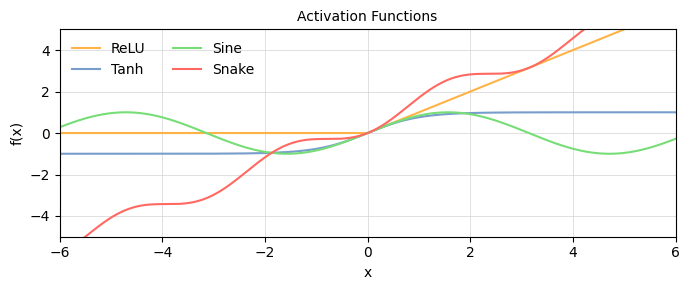

In [10]:
# plot a ReLU and Sine activation function

x = np.linspace(-2*np.pi, 2*np.pi, 1000)
relu = np.maximum(x, 0)
sine = np.sin(x)
tanh = np.tanh(x)
snake = x+np.sin(x)**2

plt.figure(figsize=(7, 3))
plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)
plt.plot(x, relu, label='ReLU', color=colors[0])
plt.plot(x, tanh, label='Tanh', color=colors[1])
plt.plot(x, sine, label='Sine', color=colors[2])
plt.plot(x, snake, label='Snake', color=colors[3])
plt.title('Activation Functions')
plt.legend(loc='upper left', frameon=False, ncols=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-2*np.pi, 2*np.pi)
plt.xlim(-6, 6)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

# Example of Data

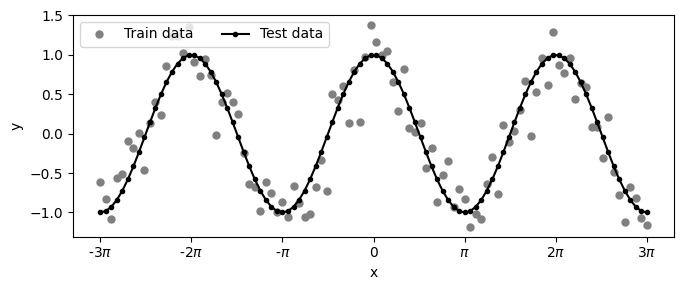

In [34]:
# GENERATE DATA
reload(func);

# Parameters for sine wave dataset
num_points = 100 #40 #50 #100
noise_std = 0.3

n_waves = 3 #5.5

# Generate data
train_x_array, train_y_array, test_x_array, test_y_array = func.generate_data(num_points, noise_std, n_waves, shifted=False)
_, _, test_x, test_y = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)

# Plot an example sample
func.plot_data_example(train_x_array, train_y_array, test_x_array, test_y_array)

# Example of training

In [12]:
# TRAIN MODEL
input_size, hidden_sizes, output_size = 1, [64, 64], 1
batch_size = 25
print_every = 500
lr = 0.01

# Define model parameters
num_points = 50
num_epochs = 100 #50  #100


# Data
train_x_array, train_y_array, test_x_array, test_y_array = func.generate_data(num_points, noise_std, n_waves, shifted=False)

# Convert data to tensors and create dataloaders
train_x, train_y, test_x, test_y = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)

###### MLP ######
ReLuMLP = func.ReLUMLP(input_size, hidden_sizes, output_size)
model_ReLUMLP, train_losses_MLP, val_losses_MLP = func.train_model(ReLuMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)


###### SineMLP ######
SineMLP = func.SineMLP(input_size, hidden_sizes, output_size)
model_SineMLP, train_losses_SineMLP, val_losses_SineMLP = func.train_model(SineMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)


###### TanhMLP ######
TanhMLP = func.TanhMLP(input_size, hidden_sizes, output_size)
model_TanhMLP, train_losses_TanhMLP, val_losses_TanhMLP = func.train_model(TanhMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

###### SnakeMLP ######
SnakeMLP = func.SnakeMLP(input_size, hidden_sizes, output_size)
model_SnakeMLP, train_losses_SnakeMLP, val_losses_SnakeMLP = func.train_model(SnakeMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

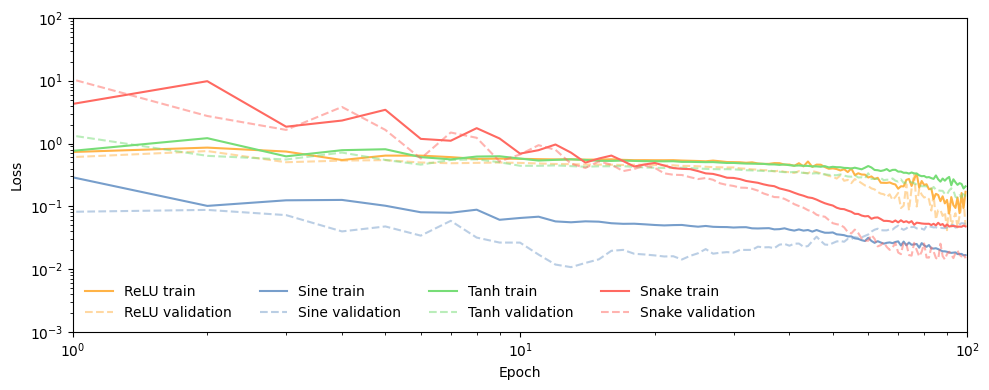

In [13]:
# Plot losses
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.plot(train_losses_MLP, label='ReLU train', color=colors[0])
ax.plot(val_losses_MLP, label='ReLU validation', ls = '--', color=colors[0], alpha=0.5)

ax.plot(train_losses_SineMLP, label='Sine train', color=colors[1])
ax.plot(val_losses_SineMLP, label='Sine validation', ls = '--', color=colors[1], alpha=0.5)

ax.plot(train_losses_TanhMLP, label='Tanh train', color=colors[2])
ax.plot(val_losses_TanhMLP, label='Tanh validation', ls = '--', color=colors[2], alpha=0.5)

ax.plot(train_losses_SnakeMLP, label='Snake train', color=colors[3])
ax.plot(val_losses_SnakeMLP, label='Snake validation', ls = '--', color=colors[3], alpha=0.5)

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower left', frameon=False, ncols=4)
ax.set_xlim(1, num_epochs)
ax.set_ylim(1e-3, 1e2)
plt.tight_layout()
#func.plot_losses(train_losses, val_losses, 'MLP')

(-1.5, 1.5)

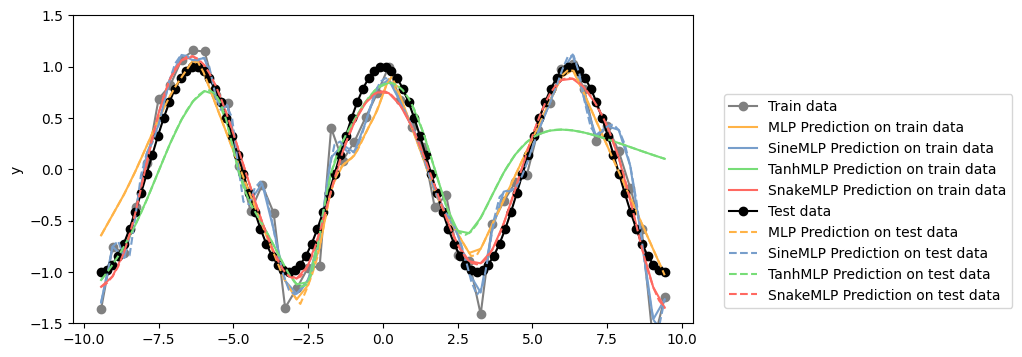

In [14]:
# plot results
from matplotlib.gridspec import GridSpec

model_ReLUMLP.eval()
model_SineMLP.eval()
model_TanhMLP.eval()
model_SnakeMLP.eval()

# Plot predictions
with torch.no_grad():
    train_pred_ReLUMLP = model_ReLUMLP(train_x).numpy().squeeze()
    test_pred_ReLUMLP = model_ReLUMLP(test_x).numpy().squeeze()

    train_pred_SineMLP = model_SineMLP(train_x).numpy().squeeze()
    test_pred_SineMLP = model_SineMLP(test_x).numpy().squeeze()

    train_pred_TanhMLP = model_TanhMLP(train_x).numpy().squeeze()
    test_pred_TanhMLP = model_TanhMLP(test_x).numpy().squeeze()

    train_pred_SnakeMLP = model_SnakeMLP(train_x).numpy().squeeze()
    test_pred_SnakeMLP = model_SnakeMLP(test_x).numpy().squeeze()


# Create a figure and specify GridSpec
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4)) #, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

ax1.plot(train_x_array, train_y_array, label='Train data', color='grey', marker='o') #, ls='-')
ax1.plot(train_x_array, train_pred_ReLUMLP, label='MLP Prediction on train data', color=colors[0])
ax1.plot(train_x_array, train_pred_SineMLP, label='SineMLP Prediction on train data', color=colors[1])
ax1.plot(train_x_array, train_pred_TanhMLP, label='TanhMLP Prediction on train data', color=colors[2])
ax1.plot(train_x_array, train_pred_SnakeMLP, label='SnakeMLP Prediction on train data', color=colors[3])


ax1.plot(test_x_array, test_y_array, label='Test data', color='black', marker='o') #, ls='-')
ax1.plot(test_x_array, test_pred_ReLUMLP, label='MLP Prediction on test data', color=colors[0], ls='--')
ax1.plot(test_x_array, test_pred_SineMLP, label='SineMLP Prediction on test data', color=colors[1], ls='--')
ax1.plot(test_x_array, test_pred_TanhMLP, label='TanhMLP Prediction on test data', color=colors[2], ls='--')
ax1.plot(test_x_array, test_pred_SnakeMLP, label='SnakeMLP Prediction on test data', color=colors[3], ls='--')



ax1.set_ylabel('y')
ax1.legend(loc = (1.05, 0.05))
ax1.set_ylim(-1.5, 1.5)

# Testing test loss vs. different parameters

In [19]:
# Parameters fixed unless otherwise specified
num_points = 100 #50
noise_std = 0.3
n_waves = 3
batch_size = 25
input_size = 1
hidden_sizes = [64, 64]
output_size = 1

# Test loss vs. number of epochs

In [22]:
# Define variable model parameters
num_epochs_list = [10, 20, 30, 40, 50, 100, 500, 1000, 5000, 10000]

In [23]:
# Initialize an empty list to collect rows for the DataFrame
results_test_loss_vs_epochs = []

for i in tqdm(range(10), desc="Outer Loop"):
    # Generate train data
    train_x_array, train_y_array, _, _ = func.generate_data(num_points, noise_std, n_waves, shifted=False)
    train_x, train_y, _, _ = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
    train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)
    
    
    # Loop over different epoch settings
    for epoch in num_epochs_list:
        # Test loss vs. epochs for ReLUMLP and SineMLP and TanhMLP
        for model_type, model_class in [("ReLUMLP", func.ReLUMLP), ("SineMLP", func.SineMLP), ("TanhMLP", func.TanhMLP), ("SnakeMLP", func.SnakeMLP)]:
            model = model_class(input_size=input_size, hidden_sizes=hidden_sizes, output_size=output_size)  
            model, train_losses, val_losses = func.train_model(model, train_loader, test_x, test_y, num_epochs=epoch)
            loss_mean = func.evaluate_model(model, test_x, test_y)

            # Store results for test loss vs. epochs
            results_test_loss_vs_epochs.append({
                "Metric_Type": "Test_Loss_vs_Epochs",
                "Model": model_type,
                "Num_points": num_points,
                "Noise_std": noise_std,
                "N_waves": n_waves,
                "Epochs": epoch,
                "Hidden_Layers": len(hidden_sizes),
                "Nodes_Per_Layer": hidden_sizes[0],
                "Batch_size": batch_size,
                "Train_Losses": train_losses,
                "Val_Losses": val_losses,
                "Test_Mean_Loss": loss_mean,
            })

# Convert the results list to a DataFrame
results_test_loss_vs_epochs = pd.DataFrame(results_test_loss_vs_epochs)

Outer Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [100/100], Train Loss: 0.3798, Validation Loss: 0.2758
Epoch [100/100], Train Loss: 0.0891, Validation Loss: 0.0057
Epoch [100/100], Train Loss: 0.4267, Validation Loss: 0.3331
Epoch [100/100], Train Loss: 0.0881, Validation Loss: 0.0341
Epoch [100/500], Train Loss: 0.3622, Validation Loss: 0.2685
Epoch [200/500], Train Loss: 0.1697, Validation Loss: 0.0801
Epoch [300/500], Train Loss: 0.0890, Validation Loss: 0.0244
Epoch [400/500], Train Loss: 0.0815, Validation Loss: 0.0175
Epoch [500/500], Train Loss: 0.0824, Validation Loss: 0.0215
Epoch [100/500], Train Loss: 0.0882, Validation Loss: 0.0117
Epoch [200/500], Train Loss: 0.0847, Validation Loss: 0.0153
Epoch [300/500], Train Loss: 0.0832, Validation Loss: 0.0155
Epoch [400/500], Train Loss: 0.0804, Validation Loss: 0.0176
Epoch [500/500], Train Loss: 0.0770, Validation Loss: 0.0212
Epoch [100/500], Train Loss: 0.4174, Validation Loss: 0.3125
Epoch [200/500], Train Loss: 0.3562, Validation Loss: 0.2354
Epoch [300/500], Train L

Outer Loop:  10%|█         | 1/10 [02:11<19:45, 131.74s/it]

Epoch [10000/10000], Train Loss: 0.0511, Validation Loss: 0.0418
Epoch [100/100], Train Loss: 0.3252, Validation Loss: 0.2457
Epoch [100/100], Train Loss: 0.0564, Validation Loss: 0.0076
Epoch [100/100], Train Loss: 0.3411, Validation Loss: 0.2779
Epoch [100/100], Train Loss: 0.0540, Validation Loss: 0.0133
Epoch [100/500], Train Loss: 0.2914, Validation Loss: 0.2278
Epoch [200/500], Train Loss: 0.0808, Validation Loss: 0.0245
Epoch [300/500], Train Loss: 0.0546, Validation Loss: 0.0144
Epoch [400/500], Train Loss: 0.0635, Validation Loss: 0.0235
Epoch [500/500], Train Loss: 0.0597, Validation Loss: 0.0363
Epoch [100/500], Train Loss: 0.0555, Validation Loss: 0.0102
Epoch [200/500], Train Loss: 0.0459, Validation Loss: 0.0153
Epoch [300/500], Train Loss: 0.0436, Validation Loss: 0.0211
Epoch [400/500], Train Loss: 0.0446, Validation Loss: 0.0212
Epoch [500/500], Train Loss: 0.0431, Validation Loss: 0.0208
Epoch [100/500], Train Loss: 0.3892, Validation Loss: 0.3299
Epoch [200/500], Tra

Outer Loop:  20%|██        | 2/10 [04:23<17:35, 132.00s/it]

Epoch [10000/10000], Train Loss: 0.0302, Validation Loss: 0.0314
Epoch [100/100], Train Loss: 0.3536, Validation Loss: 0.2369
Epoch [100/100], Train Loss: 0.0771, Validation Loss: 0.0147
Epoch [100/100], Train Loss: 0.3897, Validation Loss: 0.3048
Epoch [100/100], Train Loss: 0.0761, Validation Loss: 0.0203
Epoch [100/500], Train Loss: 0.3257, Validation Loss: 0.2342
Epoch [200/500], Train Loss: 0.1398, Validation Loss: 0.0729
Epoch [300/500], Train Loss: 0.0885, Validation Loss: 0.0253
Epoch [400/500], Train Loss: 0.0853, Validation Loss: 0.0238
Epoch [500/500], Train Loss: 0.0829, Validation Loss: 0.0242
Epoch [100/500], Train Loss: 0.0775, Validation Loss: 0.0132
Epoch [200/500], Train Loss: 0.0762, Validation Loss: 0.0202
Epoch [300/500], Train Loss: 0.0755, Validation Loss: 0.0206
Epoch [400/500], Train Loss: 0.0738, Validation Loss: 0.0181
Epoch [500/500], Train Loss: 0.0743, Validation Loss: 0.0175
Epoch [100/500], Train Loss: 0.3795, Validation Loss: 0.2928
Epoch [200/500], Tra

Outer Loop:  30%|███       | 3/10 [06:35<15:21, 131.68s/it]

Epoch [10000/10000], Train Loss: 0.0361, Validation Loss: 0.0465
Epoch [100/100], Train Loss: 0.3484, Validation Loss: 0.2934
Epoch [100/100], Train Loss: 0.0702, Validation Loss: 0.0081
Epoch [100/100], Train Loss: 0.3773, Validation Loss: 0.3159
Epoch [100/100], Train Loss: 0.0817, Validation Loss: 0.0163
Epoch [100/500], Train Loss: 0.3710, Validation Loss: 0.3133
Epoch [200/500], Train Loss: 0.2281, Validation Loss: 0.1783
Epoch [300/500], Train Loss: 0.1226, Validation Loss: 0.0647
Epoch [400/500], Train Loss: 0.0826, Validation Loss: 0.0249
Epoch [500/500], Train Loss: 0.0742, Validation Loss: 0.0194
Epoch [100/500], Train Loss: 0.0710, Validation Loss: 0.0074
Epoch [200/500], Train Loss: 0.0697, Validation Loss: 0.0085
Epoch [300/500], Train Loss: 0.0688, Validation Loss: 0.0090
Epoch [400/500], Train Loss: 0.0637, Validation Loss: 0.0133
Epoch [500/500], Train Loss: 0.0591, Validation Loss: 0.0179
Epoch [100/500], Train Loss: 0.3570, Validation Loss: 0.2934
Epoch [200/500], Tra

Outer Loop:  40%|████      | 4/10 [08:47<13:11, 131.92s/it]

Epoch [10000/10000], Train Loss: 0.0375, Validation Loss: 0.0414
Epoch [100/100], Train Loss: 0.3590, Validation Loss: 0.2768
Epoch [100/100], Train Loss: 0.0736, Validation Loss: 0.0092
Epoch [100/100], Train Loss: 0.4005, Validation Loss: 0.3153
Epoch [100/100], Train Loss: 0.0794, Validation Loss: 0.0117
Epoch [100/500], Train Loss: 0.3362, Validation Loss: 0.2568
Epoch [200/500], Train Loss: 0.1897, Validation Loss: 0.1214
Epoch [300/500], Train Loss: 0.1243, Validation Loss: 0.0590
Epoch [400/500], Train Loss: 0.0873, Validation Loss: 0.0299
Epoch [500/500], Train Loss: 0.0849, Validation Loss: 0.0229
Epoch [100/500], Train Loss: 0.0741, Validation Loss: 0.0086
Epoch [200/500], Train Loss: 0.0743, Validation Loss: 0.0109
Epoch [300/500], Train Loss: 0.0726, Validation Loss: 0.0109
Epoch [400/500], Train Loss: 0.0724, Validation Loss: 0.0127
Epoch [500/500], Train Loss: 0.0718, Validation Loss: 0.0137
Epoch [100/500], Train Loss: 0.3872, Validation Loss: 0.2912
Epoch [200/500], Tra

Outer Loop:  50%|█████     | 5/10 [10:57<10:55, 131.09s/it]

Epoch [10000/10000], Train Loss: 0.0377, Validation Loss: 0.0444
Epoch [100/100], Train Loss: 0.3568, Validation Loss: 0.3016
Epoch [100/100], Train Loss: 0.0798, Validation Loss: 0.0082
Epoch [100/100], Train Loss: 0.3748, Validation Loss: 0.3139
Epoch [100/100], Train Loss: 0.0772, Validation Loss: 0.0099
Epoch [100/500], Train Loss: 0.4059, Validation Loss: 0.3343
Epoch [200/500], Train Loss: 0.2430, Validation Loss: 0.1761
Epoch [300/500], Train Loss: 0.1313, Validation Loss: 0.0524
Epoch [400/500], Train Loss: 0.0929, Validation Loss: 0.0234
Epoch [500/500], Train Loss: 0.0875, Validation Loss: 0.0198
Epoch [100/500], Train Loss: 0.0818, Validation Loss: 0.0074
Epoch [200/500], Train Loss: 0.0791, Validation Loss: 0.0084
Epoch [300/500], Train Loss: 0.0759, Validation Loss: 0.0093
Epoch [400/500], Train Loss: 0.0730, Validation Loss: 0.0151
Epoch [500/500], Train Loss: 0.0730, Validation Loss: 0.0166
Epoch [100/500], Train Loss: 0.3728, Validation Loss: 0.3003
Epoch [200/500], Tra

Outer Loop:  60%|██████    | 6/10 [13:07<08:42, 130.69s/it]

Epoch [100/100], Train Loss: 0.3509, Validation Loss: 0.2721
Epoch [100/100], Train Loss: 0.0607, Validation Loss: 0.0156
Epoch [100/100], Train Loss: 0.3833, Validation Loss: 0.3080
Epoch [100/100], Train Loss: 0.0634, Validation Loss: 0.0143
Epoch [100/500], Train Loss: 0.3734, Validation Loss: 0.2954
Epoch [200/500], Train Loss: 0.1660, Validation Loss: 0.0937
Epoch [300/500], Train Loss: 0.0686, Validation Loss: 0.0190
Epoch [400/500], Train Loss: 0.0578, Validation Loss: 0.0190
Epoch [500/500], Train Loss: 0.0558, Validation Loss: 0.0245
Epoch [100/500], Train Loss: 0.0596, Validation Loss: 0.0156
Epoch [200/500], Train Loss: 0.0575, Validation Loss: 0.0176
Epoch [300/500], Train Loss: 0.0562, Validation Loss: 0.0196
Epoch [400/500], Train Loss: 0.0557, Validation Loss: 0.0223
Epoch [500/500], Train Loss: 0.0557, Validation Loss: 0.0238
Epoch [100/500], Train Loss: 0.3750, Validation Loss: 0.2957
Epoch [200/500], Train Loss: 0.2883, Validation Loss: 0.2008
Epoch [300/500], Train L

Outer Loop:  70%|███████   | 7/10 [15:16<06:30, 130.18s/it]

Epoch [10000/10000], Train Loss: 0.0330, Validation Loss: 0.0414
Epoch [100/100], Train Loss: 0.3017, Validation Loss: 0.1972
Epoch [100/100], Train Loss: 0.0920, Validation Loss: 0.0112
Epoch [100/100], Train Loss: 0.3947, Validation Loss: 0.3212
Epoch [100/100], Train Loss: 0.0896, Validation Loss: 0.0131
Epoch [100/500], Train Loss: 0.3279, Validation Loss: 0.2460
Epoch [200/500], Train Loss: 0.1696, Validation Loss: 0.1018
Epoch [300/500], Train Loss: 0.1105, Validation Loss: 0.0227
Epoch [400/500], Train Loss: 0.0937, Validation Loss: 0.0208
Epoch [500/500], Train Loss: 0.1226, Validation Loss: 0.0227
Epoch [100/500], Train Loss: 0.0906, Validation Loss: 0.0101
Epoch [200/500], Train Loss: 0.0873, Validation Loss: 0.0177
Epoch [300/500], Train Loss: 0.0780, Validation Loss: 0.0243
Epoch [400/500], Train Loss: 0.0750, Validation Loss: 0.0272
Epoch [500/500], Train Loss: 0.0742, Validation Loss: 0.0306
Epoch [100/500], Train Loss: 0.4045, Validation Loss: 0.3237
Epoch [200/500], Tra

Outer Loop:  80%|████████  | 8/10 [17:28<04:21, 130.87s/it]

Epoch [10000/10000], Train Loss: 0.0292, Validation Loss: 0.0659
Epoch [100/100], Train Loss: 0.3819, Validation Loss: 0.2586
Epoch [100/100], Train Loss: 0.0935, Validation Loss: 0.0151
Epoch [100/100], Train Loss: 0.4632, Validation Loss: 0.3125
Epoch [100/100], Train Loss: 0.0894, Validation Loss: 0.0198
Epoch [100/500], Train Loss: 0.4007, Validation Loss: 0.2625
Epoch [200/500], Train Loss: 0.1902, Validation Loss: 0.0972
Epoch [300/500], Train Loss: 0.1129, Validation Loss: 0.0361
Epoch [400/500], Train Loss: 0.0899, Validation Loss: 0.0256
Epoch [500/500], Train Loss: 0.0852, Validation Loss: 0.0204
Epoch [100/500], Train Loss: 0.0892, Validation Loss: 0.0106
Epoch [200/500], Train Loss: 0.0894, Validation Loss: 0.0138
Epoch [300/500], Train Loss: 0.0872, Validation Loss: 0.0133
Epoch [400/500], Train Loss: 0.0852, Validation Loss: 0.0160
Epoch [500/500], Train Loss: 0.0785, Validation Loss: 0.0205
Epoch [100/500], Train Loss: 0.4951, Validation Loss: 0.3194
Epoch [200/500], Tra

Outer Loop:  90%|█████████ | 9/10 [19:41<02:11, 131.64s/it]

Epoch [10000/10000], Train Loss: 0.0455, Validation Loss: 0.0528
Epoch [100/100], Train Loss: 0.3737, Validation Loss: 0.2715
Epoch [100/100], Train Loss: 0.0741, Validation Loss: 0.0055
Epoch [100/100], Train Loss: 0.4038, Validation Loss: 0.3028
Epoch [100/100], Train Loss: 0.0759, Validation Loss: 0.0118
Epoch [100/500], Train Loss: 0.3799, Validation Loss: 0.2742
Epoch [200/500], Train Loss: 0.1243, Validation Loss: 0.0524
Epoch [300/500], Train Loss: 0.0900, Validation Loss: 0.0251
Epoch [400/500], Train Loss: 0.0879, Validation Loss: 0.0251
Epoch [500/500], Train Loss: 0.0699, Validation Loss: 0.0331
Epoch [100/500], Train Loss: 0.0734, Validation Loss: 0.0083
Epoch [200/500], Train Loss: 0.0679, Validation Loss: 0.0151
Epoch [300/500], Train Loss: 0.0641, Validation Loss: 0.0187
Epoch [400/500], Train Loss: 0.0621, Validation Loss: 0.0178
Epoch [500/500], Train Loss: 0.0599, Validation Loss: 0.0206
Epoch [100/500], Train Loss: 0.4123, Validation Loss: 0.3293
Epoch [200/500], Tra

Outer Loop: 100%|██████████| 10/10 [21:46<00:00, 130.65s/it]

Epoch [10000/10000], Train Loss: 0.0376, Validation Loss: 0.0405


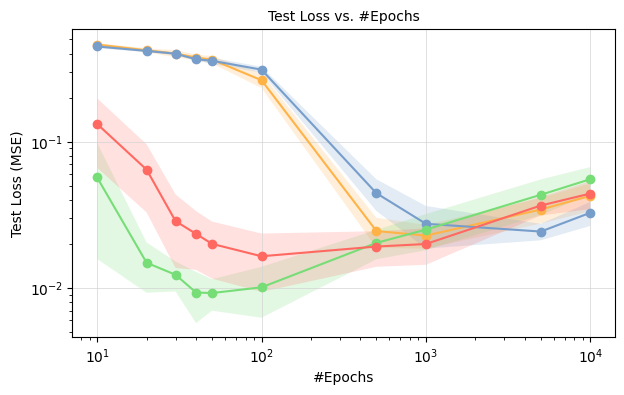

In [25]:
#results_test_loss_vs_epochs = pd.read_csv('SineResults/results_test_loss_vs_epochs.csv')

# Plot test loss vs. epochs
fig, ax = func.plot_test_loss_vs_parameter(results_test_loss_vs_epochs, 'Epochs', '#Epochs', log=True)

if save_plots:
    plt.savefig('E1_Plots/test_loss_vs_epochs_extendended_Nsamples100.png', dpi=300)

#ax.hlines(0.24, 0, 5000, linestyles='dashed', label='Baseline Test Loss', color='grey')

# save pandas DataFrame to csv
if save_results:
    results_test_loss_vs_epochs.to_csv('E1_Results/results_test_loss_vs_epochs_all_Nsamples100.csv')

# Test loss vs. number of training examples

In [ ]:
# Define variable model parameters
num_epochs = 100
num_train_points_list = [10, 20, 30, 40, 50, 100, 500, 1000, 5000, 10000] #[2, 3, 4, 6, 8, 10, 20, 50, 100, 150]

In [30]:
# Initialize an empty list to collect rows for the DataFrame
results_test_loss_vs_num_train_points = []

for _ in tqdm(range(10), desc="Outer Loop"):
    # Train data is generated for each iteration since it is dependent on the parameter num_samples

    # Loop over different number of samples
    for num_train_points in num_train_points_list:
        # Generate train data
        train_x_array, train_y_array, _, _ = func.generate_data(num_train_points, noise_std, n_waves, shifted=False)
        train_x, train_y, _, _ = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
        train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)
        

        # Test loss vs. number of samples for both MLP and SineMLP
        for i, (model_type, model_class) in enumerate([("ReLUMLP", func.ReLUMLP), ("SineMLP", func.SineMLP), ("TanhMLP", func.TanhMLP), ("SnakeMLP", func.SnakeMLP)]):
            model = model_class(input_size=input_size, hidden_sizes=hidden_sizes, output_size=output_size)  
            model, train_losses, val_losses = func.train_model(model, train_loader, test_x, test_y, num_epochs=num_epochs)
            loss_mean = func.evaluate_model(model, test_x, test_y)

            # Store results for test loss vs. number of samples
            results_test_loss_vs_num_train_points.append({
                "Metric_Type": "Test_Loss_vs_Num_Samples",
                "Model": model_type,
                "Num_points": num_train_points,
                "Noise_std": noise_std,
                "N_waves": n_waves,
                "Epochs": num_epochs,
                "Hidden_Layers": len(hidden_sizes),
                "Nodes_Per_Layer": hidden_sizes[0],
                "Batch_size": batch_size,
                "Train_Losses": train_losses,
                "Val_Losses": val_losses,
                "Test_Mean_Loss": loss_mean,
            })

# Convert the results list to a DataFrame
results_test_loss_vs_num_train_points = pd.DataFrame(results_test_loss_vs_num_train_points)

Outer Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [100/100], Train Loss: 0.7840, Validation Loss: 0.4303
Epoch [100/100], Train Loss: 0.0003, Validation Loss: 0.0934
Epoch [100/100], Train Loss: 0.6892, Validation Loss: 0.3636
Epoch [100/100], Train Loss: 0.0890, Validation Loss: 0.1749
Epoch [100/100], Train Loss: 0.4319, Validation Loss: 0.4240
Epoch [100/100], Train Loss: 0.0372, Validation Loss: 0.0455
Epoch [100/100], Train Loss: 0.3704, Validation Loss: 0.3355
Epoch [100/100], Train Loss: 0.0169, Validation Loss: 0.0660
Epoch [100/100], Train Loss: 0.5194, Validation Loss: 0.3881
Epoch [100/100], Train Loss: 0.0393, Validation Loss: 0.0156
Epoch [100/100], Train Loss: 0.5366, Validation Loss: 0.4019
Epoch [100/100], Train Loss: 0.0365, Validation Loss: 0.0457
Epoch [100/100], Train Loss: 0.4595, Validation Loss: 0.3897
Epoch [100/100], Train Loss: 0.0346, Validation Loss: 0.0250
Epoch [100/100], Train Loss: 0.4791, Validation Loss: 0.3770
Epoch [100/100], Train Loss: 0.0497, Validation Loss: 0.0265
Epoch [100/100], Train L

Outer Loop:  10%|█         | 1/10 [02:01<18:09, 121.03s/it]

Epoch [100/100], Train Loss: 0.0933, Validation Loss: 0.0039
Epoch [100/100], Train Loss: 0.5213, Validation Loss: 0.4922
Epoch [100/100], Train Loss: 0.0039, Validation Loss: 0.1796
Epoch [100/100], Train Loss: 0.3323, Validation Loss: 0.4140
Epoch [100/100], Train Loss: 0.0346, Validation Loss: 0.1181
Epoch [100/100], Train Loss: 0.5576, Validation Loss: 0.3788
Epoch [100/100], Train Loss: 0.0485, Validation Loss: 0.0501
Epoch [100/100], Train Loss: 0.4743, Validation Loss: 0.3177
Epoch [100/100], Train Loss: 0.0965, Validation Loss: 0.0785
Epoch [100/100], Train Loss: 0.4453, Validation Loss: 0.4135
Epoch [100/100], Train Loss: 0.1072, Validation Loss: 0.0241
Epoch [100/100], Train Loss: 0.4374, Validation Loss: 0.3910
Epoch [100/100], Train Loss: 0.0989, Validation Loss: 0.0404
Epoch [100/100], Train Loss: 0.4601, Validation Loss: 0.3539
Epoch [100/100], Train Loss: 0.0588, Validation Loss: 0.0444
Epoch [100/100], Train Loss: 0.4341, Validation Loss: 0.3611
Epoch [100/100], Train L

Outer Loop:  20%|██        | 2/10 [04:00<16:02, 120.31s/it]

Epoch [100/100], Train Loss: 0.0962, Validation Loss: 0.0024
Epoch [100/100], Train Loss: 0.5412, Validation Loss: 0.4643
Epoch [100/100], Train Loss: 0.0009, Validation Loss: 0.1092
Epoch [100/100], Train Loss: 0.5633, Validation Loss: 0.4460
Epoch [100/100], Train Loss: 0.0004, Validation Loss: 0.1478
Epoch [100/100], Train Loss: 0.4020, Validation Loss: 0.4104
Epoch [100/100], Train Loss: 0.0144, Validation Loss: 0.0433
Epoch [100/100], Train Loss: 0.2590, Validation Loss: 0.2788
Epoch [100/100], Train Loss: 0.0097, Validation Loss: 0.0585
Epoch [100/100], Train Loss: 0.4137, Validation Loss: 0.3999
Epoch [100/100], Train Loss: 0.0446, Validation Loss: 0.0262
Epoch [100/100], Train Loss: 0.7944, Validation Loss: 0.4099
Epoch [100/100], Train Loss: 0.0623, Validation Loss: 0.0373
Epoch [100/100], Train Loss: 0.3004, Validation Loss: 0.3243
Epoch [100/100], Train Loss: 0.0652, Validation Loss: 0.0437
Epoch [100/100], Train Loss: 0.2961, Validation Loss: 0.3503
Epoch [100/100], Train L

Outer Loop:  30%|███       | 3/10 [06:04<14:13, 121.90s/it]

Epoch [100/100], Train Loss: 0.0928, Validation Loss: 0.0034
Epoch [100/100], Train Loss: 0.5585, Validation Loss: 0.5116
Epoch [100/100], Train Loss: 0.0006, Validation Loss: 0.0682
Epoch [100/100], Train Loss: 0.5523, Validation Loss: 0.3944
Epoch [100/100], Train Loss: 0.0225, Validation Loss: 0.0789
Epoch [100/100], Train Loss: 0.6294, Validation Loss: 0.4042
Epoch [100/100], Train Loss: 0.0453, Validation Loss: 0.0650
Epoch [100/100], Train Loss: 0.5550, Validation Loss: 0.3280
Epoch [100/100], Train Loss: 0.0518, Validation Loss: 0.0748
Epoch [100/100], Train Loss: 0.4684, Validation Loss: 0.4360
Epoch [100/100], Train Loss: 0.0454, Validation Loss: 0.0386
Epoch [100/100], Train Loss: 0.4067, Validation Loss: 0.4142
Epoch [100/100], Train Loss: 0.0527, Validation Loss: 0.0320
Epoch [100/100], Train Loss: 0.4018, Validation Loss: 0.4032
Epoch [100/100], Train Loss: 0.0740, Validation Loss: 0.0298
Epoch [100/100], Train Loss: 0.3634, Validation Loss: 0.3872
Epoch [100/100], Train L

Outer Loop:  40%|████      | 4/10 [08:08<12:15, 122.57s/it]

Epoch [100/100], Train Loss: 0.0956, Validation Loss: 0.0040
Epoch [100/100], Train Loss: 0.6443, Validation Loss: 0.4381
Epoch [100/100], Train Loss: 0.0001, Validation Loss: 0.0566
Epoch [100/100], Train Loss: 0.6015, Validation Loss: 0.3545
Epoch [100/100], Train Loss: 0.0004, Validation Loss: 0.0916
Epoch [100/100], Train Loss: 0.3083, Validation Loss: 0.3636
Epoch [100/100], Train Loss: 0.0162, Validation Loss: 0.0649
Epoch [100/100], Train Loss: 0.3235, Validation Loss: 0.3744
Epoch [100/100], Train Loss: 0.0752, Validation Loss: 0.1172
Epoch [100/100], Train Loss: 0.5336, Validation Loss: 0.4213
Epoch [100/100], Train Loss: 0.0910, Validation Loss: 0.0452
Epoch [100/100], Train Loss: 0.4274, Validation Loss: 0.4202
Epoch [100/100], Train Loss: 0.0894, Validation Loss: 0.0593
Epoch [100/100], Train Loss: 0.5304, Validation Loss: 0.4042
Epoch [100/100], Train Loss: 0.0542, Validation Loss: 0.0140
Epoch [100/100], Train Loss: 0.5093, Validation Loss: 0.3719
Epoch [100/100], Train L

Outer Loop:  50%|█████     | 5/10 [10:09<10:10, 122.16s/it]

Epoch [100/100], Train Loss: 0.0911, Validation Loss: 0.0012
Epoch [100/100], Train Loss: 0.5702, Validation Loss: 0.5174
Epoch [100/100], Train Loss: 0.0004, Validation Loss: 0.1150
Epoch [100/100], Train Loss: 0.5072, Validation Loss: 0.4393
Epoch [100/100], Train Loss: 0.0024, Validation Loss: 0.1968
Epoch [100/100], Train Loss: 0.4007, Validation Loss: 0.3981
Epoch [100/100], Train Loss: 0.0055, Validation Loss: 0.0578
Epoch [100/100], Train Loss: 0.4061, Validation Loss: 0.3877
Epoch [100/100], Train Loss: 0.0192, Validation Loss: 0.0642
Epoch [100/100], Train Loss: 0.6392, Validation Loss: 0.3906
Epoch [100/100], Train Loss: 0.0473, Validation Loss: 0.0414
Epoch [100/100], Train Loss: 0.4986, Validation Loss: 0.3907
Epoch [100/100], Train Loss: 0.0492, Validation Loss: 0.0285
Epoch [100/100], Train Loss: 0.4636, Validation Loss: 0.3278
Epoch [100/100], Train Loss: 0.0634, Validation Loss: 0.0240
Epoch [100/100], Train Loss: 0.5089, Validation Loss: 0.3525
Epoch [100/100], Train L

Outer Loop:  60%|██████    | 6/10 [12:11<08:08, 122.21s/it]

Epoch [100/100], Train Loss: 0.0972, Validation Loss: 0.0044
Epoch [100/100], Train Loss: 0.6999, Validation Loss: 0.5079
Epoch [100/100], Train Loss: 0.0001, Validation Loss: 0.0806
Epoch [100/100], Train Loss: 0.6406, Validation Loss: 0.4231
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.1634
Epoch [100/100], Train Loss: 0.4518, Validation Loss: 0.4032
Epoch [100/100], Train Loss: 0.0044, Validation Loss: 0.0444
Epoch [100/100], Train Loss: 0.4385, Validation Loss: 0.3917
Epoch [100/100], Train Loss: 0.0066, Validation Loss: 0.0378
Epoch [100/100], Train Loss: 0.4889, Validation Loss: 0.4616
Epoch [100/100], Train Loss: 0.0547, Validation Loss: 0.0760
Epoch [100/100], Train Loss: 0.3132, Validation Loss: 0.4454
Epoch [100/100], Train Loss: 0.0746, Validation Loss: 0.0551
Epoch [100/100], Train Loss: 0.3086, Validation Loss: 0.3451
Epoch [100/100], Train Loss: 0.0446, Validation Loss: 0.0263
Epoch [100/100], Train Loss: 0.3443, Validation Loss: 0.3435
Epoch [100/100], Train L

Outer Loop:  70%|███████   | 7/10 [14:15<06:07, 122.49s/it]

Epoch [100/100], Train Loss: 0.0972, Validation Loss: 0.0136
Epoch [100/100], Train Loss: 0.2429, Validation Loss: 0.5418
Epoch [100/100], Train Loss: 0.0001, Validation Loss: 0.1166
Epoch [100/100], Train Loss: 0.2850, Validation Loss: 0.5267
Epoch [100/100], Train Loss: 0.0001, Validation Loss: 0.1791
Epoch [100/100], Train Loss: 0.6130, Validation Loss: 0.4021
Epoch [100/100], Train Loss: 0.0322, Validation Loss: 0.0696
Epoch [100/100], Train Loss: 0.5444, Validation Loss: 0.3383
Epoch [100/100], Train Loss: 0.0639, Validation Loss: 0.0705
Epoch [100/100], Train Loss: 0.6592, Validation Loss: 0.4385
Epoch [100/100], Train Loss: 0.0368, Validation Loss: 0.0428
Epoch [100/100], Train Loss: 0.3467, Validation Loss: 0.4359
Epoch [100/100], Train Loss: 0.0543, Validation Loss: 0.0605
Epoch [100/100], Train Loss: 0.4534, Validation Loss: 0.3712
Epoch [100/100], Train Loss: 0.0709, Validation Loss: 0.0111
Epoch [100/100], Train Loss: 0.4213, Validation Loss: 0.3436
Epoch [100/100], Train L

Outer Loop:  80%|████████  | 8/10 [16:14<04:03, 121.64s/it]

Epoch [100/100], Train Loss: 0.0945, Validation Loss: 0.0062
Epoch [100/100], Train Loss: 0.3947, Validation Loss: 0.4761
Epoch [100/100], Train Loss: 0.0001, Validation Loss: 0.0678
Epoch [100/100], Train Loss: 0.3412, Validation Loss: 0.4169
Epoch [100/100], Train Loss: 0.0002, Validation Loss: 0.1518
Epoch [100/100], Train Loss: 0.5294, Validation Loss: 0.4089
Epoch [100/100], Train Loss: 0.0395, Validation Loss: 0.0229
Epoch [100/100], Train Loss: 0.4763, Validation Loss: 0.3387
Epoch [100/100], Train Loss: 0.0361, Validation Loss: 0.0287
Epoch [100/100], Train Loss: 0.6268, Validation Loss: 0.4614
Epoch [100/100], Train Loss: 0.0490, Validation Loss: 0.0247
Epoch [100/100], Train Loss: 0.6028, Validation Loss: 0.3960
Epoch [100/100], Train Loss: 0.0433, Validation Loss: 0.0508
Epoch [100/100], Train Loss: 0.4101, Validation Loss: 0.3864
Epoch [100/100], Train Loss: 0.0565, Validation Loss: 0.0138
Epoch [100/100], Train Loss: 0.4241, Validation Loss: 0.3521
Epoch [100/100], Train L

Outer Loop:  90%|█████████ | 9/10 [18:21<02:03, 123.09s/it]

Epoch [100/100], Train Loss: 0.0944, Validation Loss: 0.0147
Epoch [100/100], Train Loss: 0.3682, Validation Loss: 0.3383
Epoch [100/100], Train Loss: 0.0001, Validation Loss: 0.0690
Epoch [100/100], Train Loss: 0.4632, Validation Loss: 0.4021
Epoch [100/100], Train Loss: 0.0010, Validation Loss: 0.1001
Epoch [100/100], Train Loss: 0.5632, Validation Loss: 0.3927
Epoch [100/100], Train Loss: 0.0424, Validation Loss: 0.0913
Epoch [100/100], Train Loss: 0.5154, Validation Loss: 0.3800
Epoch [100/100], Train Loss: 0.0367, Validation Loss: 0.0830
Epoch [100/100], Train Loss: 0.5222, Validation Loss: 0.4528
Epoch [100/100], Train Loss: 0.0850, Validation Loss: 0.0282
Epoch [100/100], Train Loss: 0.5279, Validation Loss: 0.4488
Epoch [100/100], Train Loss: 0.1580, Validation Loss: 0.0647
Epoch [100/100], Train Loss: 0.4094, Validation Loss: 0.3873
Epoch [100/100], Train Loss: 0.0442, Validation Loss: 0.0210
Epoch [100/100], Train Loss: 0.4392, Validation Loss: 0.3735
Epoch [100/100], Train L

Outer Loop: 100%|██████████| 10/10 [20:22<00:00, 122.23s/it]

Epoch [100/100], Train Loss: 0.0927, Validation Loss: 0.0026


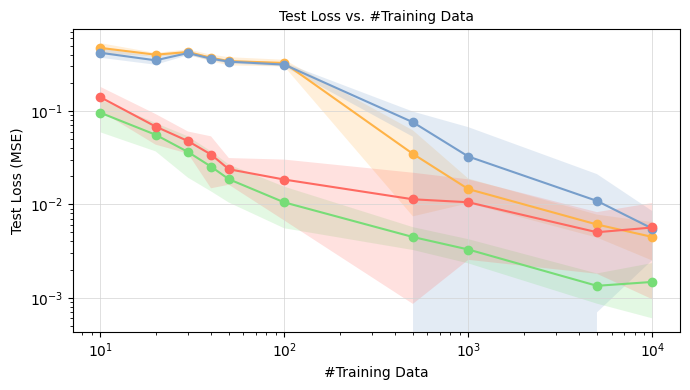

<Figure size 640x480 with 0 Axes>

In [56]:
fig, ax = func.plot_test_loss_vs_parameter(results_test_loss_vs_num_train_points, 'Num_points', '#Training Data', log=True)

if save_plots:
    plt.savefig('E1_Plots/test_loss_vs_num_train_points_Nepochs100.png', dpi=300)

if save_results:
    results_test_loss_vs_num_train_points.to_csv('E1_Results/results_test_loss_vs_num_train_points_Nepochs100.csv')

# Test loss vs. number of hidden layers

In [69]:
# Define variable model parameters
num_points = 1000
num_epochs = 100
hidden_sizes_list = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64], [64, 64, 64, 64, 64], [64, 64, 64, 64, 64, 64]]

In [70]:
# Initialize an empty list to collect rows for the DataFrame
results_test_loss_vs_num_hidden_layers = []

for _ in tqdm(range(10), desc="Outer Loop"):
    # Generate train data
    train_x_array, train_y_array, _, _ = func.generate_data(num_points, noise_std, n_waves, shifted=False)
    train_x, train_y, _, _ = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
    train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)

    # Loop over different epoch settings
    for h_sizes in hidden_sizes_list:
        # Test loss vs. epochs for both MLP and SineMLP
        for model_type, model_class in [("ReLUMLP", func.ReLUMLP), ("SineMLP", func.SineMLP), ("TanhMLP", func.TanhMLP), ("SnakeMLP", func.SnakeMLP)]:
            model = model_class(input_size=input_size, hidden_sizes=h_sizes, output_size=output_size)  
            model, train_losses, val_losses = func.train_model(model, train_loader, test_x, test_y, num_epochs=num_epochs)
            loss_mean = func.evaluate_model(model, test_x, test_y)

            # Store results for test loss vs. epochs
            results_test_loss_vs_num_hidden_layers.append({
                "Metric_Type": "Test_Loss_vs_Hidden_Layers",
                "Model": model_type,
                "Num_points": num_points,
                "Noise_std": noise_std,
                "N_waves": n_waves,
                "Epochs": epoch,
                "Hidden_Layers": len(h_sizes),
                "Nodes_Per_Layer": h_sizes[0],
                "Batch_size": batch_size,
                "Train_Losses": train_losses,
                "Val_Losses": val_losses,
                "Test_Mean_Loss": loss_mean,
            })

# Convert the results list to a DataFrame
results_test_loss_vs_num_hidden_layers = pd.DataFrame(results_test_loss_vs_num_hidden_layers)

Outer Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [100/100], Train Loss: 0.2257, Validation Loss: 0.1269
Epoch [100/100], Train Loss: 0.0956, Validation Loss: 0.0031
Epoch [100/100], Train Loss: 0.2934, Validation Loss: 0.1878
Epoch [100/100], Train Loss: 0.0996, Validation Loss: 0.0136
Epoch [100/100], Train Loss: 0.1034, Validation Loss: 0.0160
Epoch [100/100], Train Loss: 0.0973, Validation Loss: 0.0038
Epoch [100/100], Train Loss: 0.1178, Validation Loss: 0.0153
Epoch [100/100], Train Loss: 0.1049, Validation Loss: 0.0435
Epoch [100/100], Train Loss: 0.1010, Validation Loss: 0.0057
Epoch [100/100], Train Loss: 0.0957, Validation Loss: 0.0067
Epoch [100/100], Train Loss: 0.1184, Validation Loss: 0.0073
Epoch [100/100], Train Loss: 0.1095, Validation Loss: 0.0116
Epoch [100/100], Train Loss: 0.1109, Validation Loss: 0.0117
Epoch [100/100], Train Loss: 0.0976, Validation Loss: 0.0033
Epoch [100/100], Train Loss: 0.1403, Validation Loss: 0.0106
Epoch [100/100], Train Loss: 0.1055, Validation Loss: 0.0081
Epoch [100/100], Train L

Outer Loop:  10%|█         | 1/10 [00:59<08:51, 59.11s/it]

Epoch [100/100], Train Loss: 0.1022, Validation Loss: 0.0121
Epoch [100/100], Train Loss: 0.2399, Validation Loss: 0.1474
Epoch [100/100], Train Loss: 0.0972, Validation Loss: 0.0011
Epoch [100/100], Train Loss: 0.2855, Validation Loss: 0.1913
Epoch [100/100], Train Loss: 0.0977, Validation Loss: 0.0064
Epoch [100/100], Train Loss: 0.1042, Validation Loss: 0.0106
Epoch [100/100], Train Loss: 0.0958, Validation Loss: 0.0046
Epoch [100/100], Train Loss: 0.1135, Validation Loss: 0.0186
Epoch [100/100], Train Loss: 0.1015, Validation Loss: 0.0043
Epoch [100/100], Train Loss: 0.1019, Validation Loss: 0.0100
Epoch [100/100], Train Loss: 0.0966, Validation Loss: 0.0028
Epoch [100/100], Train Loss: 0.1182, Validation Loss: 0.0413
Epoch [100/100], Train Loss: 0.1074, Validation Loss: 0.0082
Epoch [100/100], Train Loss: 0.1127, Validation Loss: 0.0121
Epoch [100/100], Train Loss: 0.0964, Validation Loss: 0.0033
Epoch [100/100], Train Loss: 0.1227, Validation Loss: 0.0048
Epoch [100/100], Train L

Outer Loop:  20%|██        | 2/10 [01:56<07:45, 58.15s/it]

Epoch [100/100], Train Loss: 0.1158, Validation Loss: 0.0142
Epoch [100/100], Train Loss: 0.2380, Validation Loss: 0.1507
Epoch [100/100], Train Loss: 0.0866, Validation Loss: 0.0025
Epoch [100/100], Train Loss: 0.2648, Validation Loss: 0.1813
Epoch [100/100], Train Loss: 0.0886, Validation Loss: 0.0019
Epoch [100/100], Train Loss: 0.1019, Validation Loss: 0.0147
Epoch [100/100], Train Loss: 0.0878, Validation Loss: 0.0044
Epoch [100/100], Train Loss: 0.1053, Validation Loss: 0.0241
Epoch [100/100], Train Loss: 0.0968, Validation Loss: 0.0080
Epoch [100/100], Train Loss: 0.0923, Validation Loss: 0.0125
Epoch [100/100], Train Loss: 0.0874, Validation Loss: 0.0050
Epoch [100/100], Train Loss: 0.1186, Validation Loss: 0.0483
Epoch [100/100], Train Loss: 0.0983, Validation Loss: 0.0086
Epoch [100/100], Train Loss: 0.0961, Validation Loss: 0.0109
Epoch [100/100], Train Loss: 0.0865, Validation Loss: 0.0036
Epoch [100/100], Train Loss: 0.1106, Validation Loss: 0.0171
Epoch [100/100], Train L

Outer Loop:  30%|███       | 3/10 [02:54<06:47, 58.19s/it]

Epoch [100/100], Train Loss: 0.0946, Validation Loss: 0.0058
Epoch [100/100], Train Loss: 0.2608, Validation Loss: 0.1755
Epoch [100/100], Train Loss: 0.0864, Validation Loss: 0.0030
Epoch [100/100], Train Loss: 0.2646, Validation Loss: 0.1861
Epoch [100/100], Train Loss: 0.0890, Validation Loss: 0.0101
Epoch [100/100], Train Loss: 0.0958, Validation Loss: 0.0182
Epoch [100/100], Train Loss: 0.0867, Validation Loss: 0.0024
Epoch [100/100], Train Loss: 0.0974, Validation Loss: 0.0196
Epoch [100/100], Train Loss: 0.0905, Validation Loss: 0.0353
Epoch [100/100], Train Loss: 0.0985, Validation Loss: 0.0173
Epoch [100/100], Train Loss: 0.0867, Validation Loss: 0.0039
Epoch [100/100], Train Loss: 0.1049, Validation Loss: 0.0112
Epoch [100/100], Train Loss: 0.0901, Validation Loss: 0.0159
Epoch [100/100], Train Loss: 0.0929, Validation Loss: 0.0249
Epoch [100/100], Train Loss: 0.0870, Validation Loss: 0.0053
Epoch [100/100], Train Loss: 0.0949, Validation Loss: 0.0047
Epoch [100/100], Train L

Outer Loop:  40%|████      | 4/10 [03:55<05:55, 59.19s/it]

Epoch [100/100], Train Loss: 0.0963, Validation Loss: 0.0068
Epoch [100/100], Train Loss: 0.3422, Validation Loss: 0.2499
Epoch [100/100], Train Loss: 0.0953, Validation Loss: 0.0016
Epoch [100/100], Train Loss: 0.2843, Validation Loss: 0.2081
Epoch [100/100], Train Loss: 0.0973, Validation Loss: 0.0019
Epoch [100/100], Train Loss: 0.1027, Validation Loss: 0.0074
Epoch [100/100], Train Loss: 0.0949, Validation Loss: 0.0027
Epoch [100/100], Train Loss: 0.1259, Validation Loss: 0.0157
Epoch [100/100], Train Loss: 0.0989, Validation Loss: 0.0037
Epoch [100/100], Train Loss: 0.1007, Validation Loss: 0.0114
Epoch [100/100], Train Loss: 0.0943, Validation Loss: 0.0029
Epoch [100/100], Train Loss: 0.1106, Validation Loss: 0.0116
Epoch [100/100], Train Loss: 0.1075, Validation Loss: 0.0156
Epoch [100/100], Train Loss: 0.1012, Validation Loss: 0.0064
Epoch [100/100], Train Loss: 0.0938, Validation Loss: 0.0038
Epoch [100/100], Train Loss: 0.1243, Validation Loss: 0.0136
Epoch [100/100], Train L

Outer Loop:  50%|█████     | 5/10 [04:53<04:52, 58.57s/it]

Epoch [100/100], Train Loss: 0.1045, Validation Loss: 0.0210
Epoch [100/100], Train Loss: 0.2959, Validation Loss: 0.1976
Epoch [100/100], Train Loss: 0.0883, Validation Loss: 0.0016
Epoch [100/100], Train Loss: 0.2807, Validation Loss: 0.1931
Epoch [100/100], Train Loss: 0.0907, Validation Loss: 0.0027
Epoch [100/100], Train Loss: 0.1008, Validation Loss: 0.0175
Epoch [100/100], Train Loss: 0.0889, Validation Loss: 0.0055
Epoch [100/100], Train Loss: 0.1075, Validation Loss: 0.0092
Epoch [100/100], Train Loss: 0.0908, Validation Loss: 0.0040
Epoch [100/100], Train Loss: 0.0967, Validation Loss: 0.0136
Epoch [100/100], Train Loss: 0.0895, Validation Loss: 0.0059
Epoch [100/100], Train Loss: 0.1134, Validation Loss: 0.0600
Epoch [100/100], Train Loss: 0.0957, Validation Loss: 0.0065
Epoch [100/100], Train Loss: 0.0954, Validation Loss: 0.0273
Epoch [100/100], Train Loss: 0.0898, Validation Loss: 0.0067
Epoch [100/100], Train Loss: 0.1090, Validation Loss: 0.0081
Epoch [100/100], Train L

Outer Loop:  60%|██████    | 6/10 [05:50<03:53, 58.26s/it]

Epoch [100/100], Train Loss: 0.0968, Validation Loss: 0.0089
Epoch [100/100], Train Loss: 0.2857, Validation Loss: 0.2052
Epoch [100/100], Train Loss: 0.0944, Validation Loss: 0.0030
Epoch [100/100], Train Loss: 0.2406, Validation Loss: 0.1721
Epoch [100/100], Train Loss: 0.0949, Validation Loss: 0.0056
Epoch [100/100], Train Loss: 0.1050, Validation Loss: 0.0122
Epoch [100/100], Train Loss: 0.0961, Validation Loss: 0.0096
Epoch [100/100], Train Loss: 0.1135, Validation Loss: 0.0305
Epoch [100/100], Train Loss: 0.0990, Validation Loss: 0.0039
Epoch [100/100], Train Loss: 0.1012, Validation Loss: 0.0215
Epoch [100/100], Train Loss: 0.0953, Validation Loss: 0.0069
Epoch [100/100], Train Loss: 0.1060, Validation Loss: 0.0278
Epoch [100/100], Train Loss: 0.1053, Validation Loss: 0.0120
Epoch [100/100], Train Loss: 0.1010, Validation Loss: 0.0210
Epoch [100/100], Train Loss: 0.0956, Validation Loss: 0.0055
Epoch [100/100], Train Loss: 0.1166, Validation Loss: 0.0190
Epoch [100/100], Train L

Outer Loop:  70%|███████   | 7/10 [06:48<02:54, 58.13s/it]

Epoch [100/100], Train Loss: 0.1022, Validation Loss: 0.0071
Epoch [100/100], Train Loss: 0.2000, Validation Loss: 0.1115
Epoch [100/100], Train Loss: 0.0915, Validation Loss: 0.0028
Epoch [100/100], Train Loss: 0.2649, Validation Loss: 0.1859
Epoch [100/100], Train Loss: 0.0941, Validation Loss: 0.0124
Epoch [100/100], Train Loss: 0.1106, Validation Loss: 0.0123
Epoch [100/100], Train Loss: 0.0925, Validation Loss: 0.0045
Epoch [100/100], Train Loss: 0.1134, Validation Loss: 0.0191
Epoch [100/100], Train Loss: 0.0976, Validation Loss: 0.0121
Epoch [100/100], Train Loss: 0.0999, Validation Loss: 0.0049
Epoch [100/100], Train Loss: 0.0905, Validation Loss: 0.0020
Epoch [100/100], Train Loss: 0.1076, Validation Loss: 0.0127
Epoch [100/100], Train Loss: 0.1053, Validation Loss: 0.0067
Epoch [100/100], Train Loss: 0.1021, Validation Loss: 0.0223
Epoch [100/100], Train Loss: 0.0925, Validation Loss: 0.0040
Epoch [100/100], Train Loss: 0.1102, Validation Loss: 0.0429
Epoch [100/100], Train L

Outer Loop:  80%|████████  | 8/10 [07:46<01:55, 57.93s/it]

Epoch [100/100], Train Loss: 0.1009, Validation Loss: 0.0068
Epoch [100/100], Train Loss: 0.3166, Validation Loss: 0.2258
Epoch [100/100], Train Loss: 0.0878, Validation Loss: 0.0012
Epoch [100/100], Train Loss: 0.2543, Validation Loss: 0.1712
Epoch [100/100], Train Loss: 0.0926, Validation Loss: 0.0268
Epoch [100/100], Train Loss: 0.1011, Validation Loss: 0.0172
Epoch [100/100], Train Loss: 0.0881, Validation Loss: 0.0046
Epoch [100/100], Train Loss: 0.1319, Validation Loss: 0.0199
Epoch [100/100], Train Loss: 0.0953, Validation Loss: 0.0077
Epoch [100/100], Train Loss: 0.1021, Validation Loss: 0.0054
Epoch [100/100], Train Loss: 0.0893, Validation Loss: 0.0061
Epoch [100/100], Train Loss: 0.1085, Validation Loss: 0.0094
Epoch [100/100], Train Loss: 0.0994, Validation Loss: 0.0085
Epoch [100/100], Train Loss: 0.0958, Validation Loss: 0.0133
Epoch [100/100], Train Loss: 0.0882, Validation Loss: 0.0062
Epoch [100/100], Train Loss: 0.0978, Validation Loss: 0.0077
Epoch [100/100], Train L

Outer Loop:  90%|█████████ | 9/10 [08:42<00:57, 57.53s/it]

Epoch [100/100], Train Loss: 0.1022, Validation Loss: 0.0202
Epoch [100/100], Train Loss: 0.3303, Validation Loss: 0.2452
Epoch [100/100], Train Loss: 0.0953, Validation Loss: 0.0014
Epoch [100/100], Train Loss: 0.2549, Validation Loss: 0.1741
Epoch [100/100], Train Loss: 0.0967, Validation Loss: 0.0103
Epoch [100/100], Train Loss: 0.1028, Validation Loss: 0.0401
Epoch [100/100], Train Loss: 0.0952, Validation Loss: 0.0036
Epoch [100/100], Train Loss: 0.1092, Validation Loss: 0.0280
Epoch [100/100], Train Loss: 0.1011, Validation Loss: 0.0137
Epoch [100/100], Train Loss: 0.0981, Validation Loss: 0.0104
Epoch [100/100], Train Loss: 0.0962, Validation Loss: 0.0059
Epoch [100/100], Train Loss: 0.1132, Validation Loss: 0.0209
Epoch [100/100], Train Loss: 0.1011, Validation Loss: 0.0158
Epoch [100/100], Train Loss: 0.1025, Validation Loss: 0.0075
Epoch [100/100], Train Loss: 0.0980, Validation Loss: 0.0044
Epoch [100/100], Train Loss: 0.1117, Validation Loss: 0.0069
Epoch [100/100], Train L

Outer Loop: 100%|██████████| 10/10 [09:40<00:00, 58.09s/it]

Epoch [100/100], Train Loss: 0.1066, Validation Loss: 0.0102


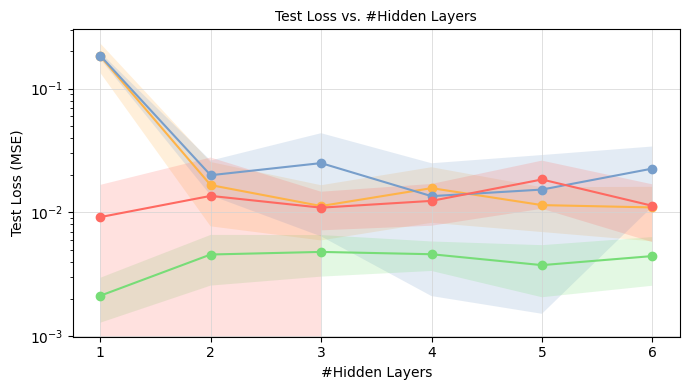

<Figure size 640x480 with 0 Axes>

In [71]:
fig, ax = func.plot_test_loss_vs_parameter(results_test_loss_vs_num_hidden_layers, 'Hidden_Layers', '#Hidden Layers')

if save_plots:
    plt.savefig('E1_Plots/test_loss_vs_hidden_layers_Nsamples1000_Nepchs100.png', dpi=300)

if save_results:
    results_test_loss_vs_num_hidden_layers.to_csv('E1_Results/results_test_loss_vs_num_hidden_layers_Nsamples1000_Nepchs100.csv')

# Test loss vs. number of nodes in hidden layers

In [72]:
# Define variable model parameters
num_points = 1000
num_epochs = 100
num_nodes_list = [[2, 2], [4, 4], [8, 8], [16, 16], [32, 32], [64, 64], [128, 128]]

In [73]:
# Initialize an empty list to collect rows for the DataFrame
results_test_loss_vs_num_nodes = []

for _ in tqdm(range(10), desc="Outer Loop"):
    # Generate train data
    train_x_array, train_y_array, _, _ = func.generate_data(num_points, noise_std, n_waves, shifted=False)
    train_x, train_y, _, _ = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
    train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)

    # Loop over different epoch settings
    for num_nodes in num_nodes_list:
        # Test loss vs. epochs for both MLP and SineMLP
        for model_type, model_class in [("ReLUMLP", func.ReLUMLP), ("SineMLP", func.SineMLP), ("TanhMLP", func.TanhMLP), ("SnakeMLP", func.SnakeMLP)]:
            model = model_class(input_size=input_size, hidden_sizes=num_nodes, output_size=output_size)  
            model, train_losses, val_losses = func.train_model(model, train_loader, test_x, test_y, num_epochs=num_epochs)
            loss_mean = func.evaluate_model(model, test_x, test_y)

            # Store results for test loss vs. epochs
            results_test_loss_vs_num_nodes.append({
                "Metric_Type": "Test_Loss_vs_Nodes_Per_Layer",
                "Model": model_type,
                "Num_points": num_points,
                "Noise_std": noise_std,
                "N_waves": n_waves,
                "Epochs": epoch,
                "Hidden_Layers": len(num_nodes),
                "Nodes_Per_Layer": num_nodes[0],
                "Batch_size": batch_size,
                "Train_Losses": train_losses,
                "Val_Losses": val_losses,
                "Test_Mean_Loss": loss_mean,
            })

# Convert the results list to a DataFrame
results_test_loss_vs_num_nodes = pd.DataFrame(results_test_loss_vs_num_nodes)

Outer Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [100/100], Train Loss: 0.5872, Validation Loss: 0.5051
Epoch [100/100], Train Loss: 0.1029, Validation Loss: 0.0231
Epoch [100/100], Train Loss: 0.4932, Validation Loss: 0.4100
Epoch [100/100], Train Loss: 0.2011, Validation Loss: 0.1136
Epoch [100/100], Train Loss: 0.5262, Validation Loss: 0.4346
Epoch [100/100], Train Loss: 0.0801, Validation Loss: 0.0018
Epoch [100/100], Train Loss: 0.3433, Validation Loss: 0.2767
Epoch [100/100], Train Loss: 0.0971, Validation Loss: 0.0148
Epoch [100/100], Train Loss: 0.3237, Validation Loss: 0.2473
Epoch [100/100], Train Loss: 0.0797, Validation Loss: 0.0011
Epoch [100/100], Train Loss: 0.2421, Validation Loss: 0.1651
Epoch [100/100], Train Loss: 0.0832, Validation Loss: 0.0035
Epoch [100/100], Train Loss: 0.1018, Validation Loss: 0.0234
Epoch [100/100], Train Loss: 0.0802, Validation Loss: 0.0024
Epoch [100/100], Train Loss: 0.3457, Validation Loss: 0.2732
Epoch [100/100], Train Loss: 0.0805, Validation Loss: 0.0100
Epoch [100/100], Train L

Outer Loop:  10%|█         | 1/10 [00:48<07:13, 48.20s/it]

Epoch [100/100], Train Loss: 0.0870, Validation Loss: 0.0064
Epoch [100/100], Train Loss: 0.5646, Validation Loss: 0.4910
Epoch [100/100], Train Loss: 0.5660, Validation Loss: 0.4957
Epoch [100/100], Train Loss: 0.4920, Validation Loss: 0.4111
Epoch [100/100], Train Loss: 0.5543, Validation Loss: 0.4834
Epoch [100/100], Train Loss: 0.5222, Validation Loss: 0.4461
Epoch [100/100], Train Loss: 0.0899, Validation Loss: 0.0009
Epoch [100/100], Train Loss: 0.4129, Validation Loss: 0.3368
Epoch [100/100], Train Loss: 0.0905, Validation Loss: 0.0022
Epoch [100/100], Train Loss: 0.1968, Validation Loss: 0.1074
Epoch [100/100], Train Loss: 0.0895, Validation Loss: 0.0021
Epoch [100/100], Train Loss: 0.2469, Validation Loss: 0.1716
Epoch [100/100], Train Loss: 0.0914, Validation Loss: 0.0059
Epoch [100/100], Train Loss: 0.1288, Validation Loss: 0.0563
Epoch [100/100], Train Loss: 0.0909, Validation Loss: 0.0059
Epoch [100/100], Train Loss: 0.2258, Validation Loss: 0.1499
Epoch [100/100], Train L

Outer Loop:  20%|██        | 2/10 [01:36<06:24, 48.12s/it]

Epoch [100/100], Train Loss: 0.1169, Validation Loss: 0.0056
Epoch [100/100], Train Loss: 0.6078, Validation Loss: 0.5001
Epoch [100/100], Train Loss: 0.6099, Validation Loss: 0.5006
Epoch [100/100], Train Loss: 0.4931, Validation Loss: 0.3933
Epoch [100/100], Train Loss: 0.5997, Validation Loss: 0.4937
Epoch [100/100], Train Loss: 0.3313, Validation Loss: 0.2352
Epoch [100/100], Train Loss: 0.0871, Validation Loss: 0.0016
Epoch [100/100], Train Loss: 0.5101, Validation Loss: 0.4089
Epoch [100/100], Train Loss: 0.0880, Validation Loss: 0.0051
Epoch [100/100], Train Loss: 0.4876, Validation Loss: 0.3897
Epoch [100/100], Train Loss: 0.0873, Validation Loss: 0.0018
Epoch [100/100], Train Loss: 0.2689, Validation Loss: 0.1736
Epoch [100/100], Train Loss: 0.0887, Validation Loss: 0.0034
Epoch [100/100], Train Loss: 0.1162, Validation Loss: 0.0298
Epoch [100/100], Train Loss: 0.0868, Validation Loss: 0.0021
Epoch [100/100], Train Loss: 0.2619, Validation Loss: 0.1760
Epoch [100/100], Train L

Outer Loop:  30%|███       | 3/10 [02:24<05:36, 48.08s/it]

Epoch [100/100], Train Loss: 0.0935, Validation Loss: 0.0150
Epoch [100/100], Train Loss: 0.5475, Validation Loss: 0.4891
Epoch [100/100], Train Loss: 0.0871, Validation Loss: 0.0046
Epoch [100/100], Train Loss: 0.4584, Validation Loss: 0.4007
Epoch [100/100], Train Loss: 0.3437, Validation Loss: 0.2765
Epoch [100/100], Train Loss: 0.5179, Validation Loss: 0.4599
Epoch [100/100], Train Loss: 0.0846, Validation Loss: 0.0015
Epoch [100/100], Train Loss: 0.4157, Validation Loss: 0.3538
Epoch [100/100], Train Loss: 0.0897, Validation Loss: 0.0073
Epoch [100/100], Train Loss: 0.4577, Validation Loss: 0.3989
Epoch [100/100], Train Loss: 0.0848, Validation Loss: 0.0022
Epoch [100/100], Train Loss: 0.1224, Validation Loss: 0.0434
Epoch [100/100], Train Loss: 0.0850, Validation Loss: 0.0052
Epoch [100/100], Train Loss: 0.0960, Validation Loss: 0.0123
Epoch [100/100], Train Loss: 0.0844, Validation Loss: 0.0028
Epoch [100/100], Train Loss: 0.1090, Validation Loss: 0.0347
Epoch [100/100], Train L

Outer Loop:  40%|████      | 4/10 [03:12<04:48, 48.13s/it]

Epoch [100/100], Train Loss: 0.0968, Validation Loss: 0.0560
Epoch [100/100], Train Loss: 0.5496, Validation Loss: 0.4546
Epoch [100/100], Train Loss: 0.0939, Validation Loss: 0.0012
Epoch [100/100], Train Loss: 0.4969, Validation Loss: 0.4111
Epoch [100/100], Train Loss: 0.5894, Validation Loss: 0.4959
Epoch [100/100], Train Loss: 0.4500, Validation Loss: 0.3654
Epoch [100/100], Train Loss: 0.0927, Validation Loss: 0.0014
Epoch [100/100], Train Loss: 0.4234, Validation Loss: 0.3413
Epoch [100/100], Train Loss: 0.1105, Validation Loss: 0.0191
Epoch [100/100], Train Loss: 0.1593, Validation Loss: 0.0701
Epoch [100/100], Train Loss: 0.0929, Validation Loss: 0.0008
Epoch [100/100], Train Loss: 0.3082, Validation Loss: 0.2139
Epoch [100/100], Train Loss: 0.0941, Validation Loss: 0.0036
Epoch [100/100], Train Loss: 0.1070, Validation Loss: 0.0111
Epoch [100/100], Train Loss: 0.0931, Validation Loss: 0.0014
Epoch [100/100], Train Loss: 0.2563, Validation Loss: 0.1616
Epoch [100/100], Train L

Outer Loop:  50%|█████     | 5/10 [04:00<04:00, 48.06s/it]

Epoch [100/100], Train Loss: 0.0972, Validation Loss: 0.0040
Epoch [100/100], Train Loss: 0.5947, Validation Loss: 0.4937
Epoch [100/100], Train Loss: 0.1164, Validation Loss: 0.0212
Epoch [100/100], Train Loss: 0.5095, Validation Loss: 0.4094
Epoch [100/100], Train Loss: 0.5633, Validation Loss: 0.4549
Epoch [100/100], Train Loss: 0.3398, Validation Loss: 0.2491
Epoch [100/100], Train Loss: 0.0949, Validation Loss: 0.0009
Epoch [100/100], Train Loss: 0.4407, Validation Loss: 0.3457
Epoch [100/100], Train Loss: 0.0974, Validation Loss: 0.0043
Epoch [100/100], Train Loss: 0.3017, Validation Loss: 0.2084
Epoch [100/100], Train Loss: 0.0946, Validation Loss: 0.0011
Epoch [100/100], Train Loss: 0.2947, Validation Loss: 0.1991
Epoch [100/100], Train Loss: 0.0966, Validation Loss: 0.0020
Epoch [100/100], Train Loss: 0.1189, Validation Loss: 0.0251
Epoch [100/100], Train Loss: 0.0949, Validation Loss: 0.0013
Epoch [100/100], Train Loss: 0.2560, Validation Loss: 0.1586
Epoch [100/100], Train L

Outer Loop:  60%|██████    | 6/10 [04:48<03:12, 48.00s/it]

Epoch [100/100], Train Loss: 0.1081, Validation Loss: 0.0047
Epoch [100/100], Train Loss: 0.5034, Validation Loss: 0.4080
Epoch [100/100], Train Loss: 0.0814, Validation Loss: 0.0006
Epoch [100/100], Train Loss: 0.5049, Validation Loss: 0.4088
Epoch [100/100], Train Loss: 0.5868, Validation Loss: 0.4882
Epoch [100/100], Train Loss: 0.5538, Validation Loss: 0.4597
Epoch [100/100], Train Loss: 0.0804, Validation Loss: 0.0013
Epoch [100/100], Train Loss: 0.3732, Validation Loss: 0.2855
Epoch [100/100], Train Loss: 0.0878, Validation Loss: 0.0107
Epoch [100/100], Train Loss: 0.2996, Validation Loss: 0.2044
Epoch [100/100], Train Loss: 0.0806, Validation Loss: 0.0016
Epoch [100/100], Train Loss: 0.3558, Validation Loss: 0.2684
Epoch [100/100], Train Loss: 0.0836, Validation Loss: 0.0114
Epoch [100/100], Train Loss: 0.1319, Validation Loss: 0.0437
Epoch [100/100], Train Loss: 0.0805, Validation Loss: 0.0023
Epoch [100/100], Train Loss: 0.2513, Validation Loss: 0.1556
Epoch [100/100], Train L

Outer Loop:  70%|███████   | 7/10 [05:36<02:23, 47.95s/it]

Epoch [100/100], Train Loss: 0.0960, Validation Loss: 0.0134
Epoch [100/100], Train Loss: 0.5635, Validation Loss: 0.5100
Epoch [100/100], Train Loss: 0.0860, Validation Loss: 0.0015
Epoch [100/100], Train Loss: 0.4369, Validation Loss: 0.3761
Epoch [100/100], Train Loss: 0.1508, Validation Loss: 0.0770
Epoch [100/100], Train Loss: 0.5536, Validation Loss: 0.4959
Epoch [100/100], Train Loss: 0.0857, Validation Loss: 0.0015
Epoch [100/100], Train Loss: 0.3979, Validation Loss: 0.3419
Epoch [100/100], Train Loss: 0.0886, Validation Loss: 0.0050
Epoch [100/100], Train Loss: 0.4079, Validation Loss: 0.3503
Epoch [100/100], Train Loss: 0.0863, Validation Loss: 0.0012
Epoch [100/100], Train Loss: 0.3344, Validation Loss: 0.2727
Epoch [100/100], Train Loss: 0.0885, Validation Loss: 0.0037
Epoch [100/100], Train Loss: 0.2747, Validation Loss: 0.2002
Epoch [100/100], Train Loss: 0.0873, Validation Loss: 0.0021
Epoch [100/100], Train Loss: 0.1176, Validation Loss: 0.0349
Epoch [100/100], Train L

Outer Loop:  80%|████████  | 8/10 [06:24<01:35, 47.92s/it]

Epoch [100/100], Train Loss: 0.1139, Validation Loss: 0.0342
Epoch [100/100], Train Loss: 0.6147, Validation Loss: 0.5032
Epoch [100/100], Train Loss: 0.0942, Validation Loss: 0.0041
Epoch [100/100], Train Loss: 0.5184, Validation Loss: 0.4140
Epoch [100/100], Train Loss: 0.6050, Validation Loss: 0.4944
Epoch [100/100], Train Loss: 0.5133, Validation Loss: 0.4141
Epoch [100/100], Train Loss: 0.0910, Validation Loss: 0.0007
Epoch [100/100], Train Loss: 0.4260, Validation Loss: 0.3255
Epoch [100/100], Train Loss: 0.0954, Validation Loss: 0.0060
Epoch [100/100], Train Loss: 0.3053, Validation Loss: 0.2060
Epoch [100/100], Train Loss: 0.0905, Validation Loss: 0.0013
Epoch [100/100], Train Loss: 0.3692, Validation Loss: 0.2739
Epoch [100/100], Train Loss: 0.0920, Validation Loss: 0.0025
Epoch [100/100], Train Loss: 0.2953, Validation Loss: 0.1971
Epoch [100/100], Train Loss: 0.0914, Validation Loss: 0.0015
Epoch [100/100], Train Loss: 0.1530, Validation Loss: 0.0538
Epoch [100/100], Train L

Outer Loop:  90%|█████████ | 9/10 [07:11<00:47, 47.93s/it]

Epoch [100/100], Train Loss: 0.1031, Validation Loss: 0.0078
Epoch [100/100], Train Loss: 0.4976, Validation Loss: 0.4073
Epoch [100/100], Train Loss: 0.0930, Validation Loss: 0.0013
Epoch [100/100], Train Loss: 0.4639, Validation Loss: 0.3757
Epoch [100/100], Train Loss: 0.5235, Validation Loss: 0.4368
Epoch [100/100], Train Loss: 0.3800, Validation Loss: 0.2892
Epoch [100/100], Train Loss: 0.0920, Validation Loss: 0.0013
Epoch [100/100], Train Loss: 0.5019, Validation Loss: 0.4104
Epoch [100/100], Train Loss: 0.1266, Validation Loss: 0.0390
Epoch [100/100], Train Loss: 0.3447, Validation Loss: 0.2470
Epoch [100/100], Train Loss: 0.0918, Validation Loss: 0.0010
Epoch [100/100], Train Loss: 0.3639, Validation Loss: 0.2787
Epoch [100/100], Train Loss: 0.0941, Validation Loss: 0.0031
Epoch [100/100], Train Loss: 0.2935, Validation Loss: 0.1980
Epoch [100/100], Train Loss: 0.0915, Validation Loss: 0.0017
Epoch [100/100], Train Loss: 0.2685, Validation Loss: 0.1810
Epoch [100/100], Train L

Outer Loop: 100%|██████████| 10/10 [08:01<00:00, 48.15s/it]

Epoch [100/100], Train Loss: 0.1024, Validation Loss: 0.0028


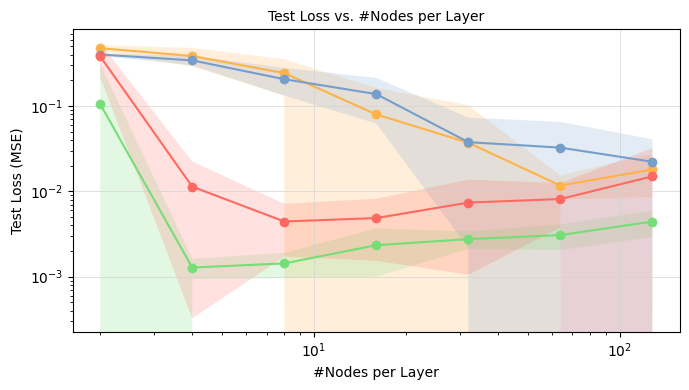

<Figure size 640x480 with 0 Axes>

In [74]:
fig, ax = func.plot_test_loss_vs_parameter(results_test_loss_vs_num_nodes, 'Nodes_Per_Layer', '#Nodes per Layer',log=True)

if save_plots:
    plt.savefig('E1_Plots/test_loss_vs_nodes_per_layer_Nsamples1000.png', dpi=300)

if save_results:
    results_test_loss_vs_num_nodes.to_csv('E1_Results/results_test_loss_vs_num_nodes_Nsamples1000.csv')

# Plot summary

In [81]:
results_test_loss_vs_epochs = pd.read_csv('E1_Results/results_test_loss_vs_epochs_all_Nsamples100.csv')
results_test_loss_vs_num_train_points = pd.read_csv('E1_Results/results_test_loss_vs_num_train_points_Nepochs100.csv') # Nepochs1000
results_test_loss_vs_num_nodes = pd.read_csv('E1_Results/results_test_loss_vs_num_nodes_Nsamples100.csv') 
results_test_loss_vs_num_hidden_layers = pd.read_csv('E1_Results/results_test_loss_vs_num_hidden_layers_Nsamples1000_Nepchs100.csv') #_Nsamples5000

In [82]:
# print std for each model
print("Standard deviation for each model")
print("Epochs:")
print(results_test_loss_vs_epochs.groupby('Model')['Test_Mean_Loss'].std())
print("\nNum Samples:")
print(results_test_loss_vs_num_train_points.groupby('Model')['Test_Mean_Loss'].std())
print("\nNum Nodes:")
print(results_test_loss_vs_num_nodes.groupby('Model')['Test_Mean_Loss'].std())
print("\nNum Hidden Layers:")
print(results_test_loss_vs_num_hidden_layers.groupby('Model')['Test_Mean_Loss'].std())


Standard deviation for each model
Epochs:
Model
ReLUMLP     0.179428
SineMLP     0.022853
SnakeMLP    0.040996
TanhMLP     0.176374
Name: Test_Mean_Loss, dtype: float64

Num Samples:
Model
ReLUMLP     0.190203
SineMLP     0.032219
SnakeMLP    0.043204
TanhMLP     0.169929
Name: Test_Mean_Loss, dtype: float64

Num Nodes:
Model
ReLUMLP     0.125372
SineMLP     0.157285
SnakeMLP    0.187606
TanhMLP     0.087754
Name: Test_Mean_Loss, dtype: float64

Num Hidden Layers:
Model
ReLUMLP     0.067089
SineMLP     0.001809
SnakeMLP    0.008200
TanhMLP     0.063609
Name: Test_Mean_Loss, dtype: float64


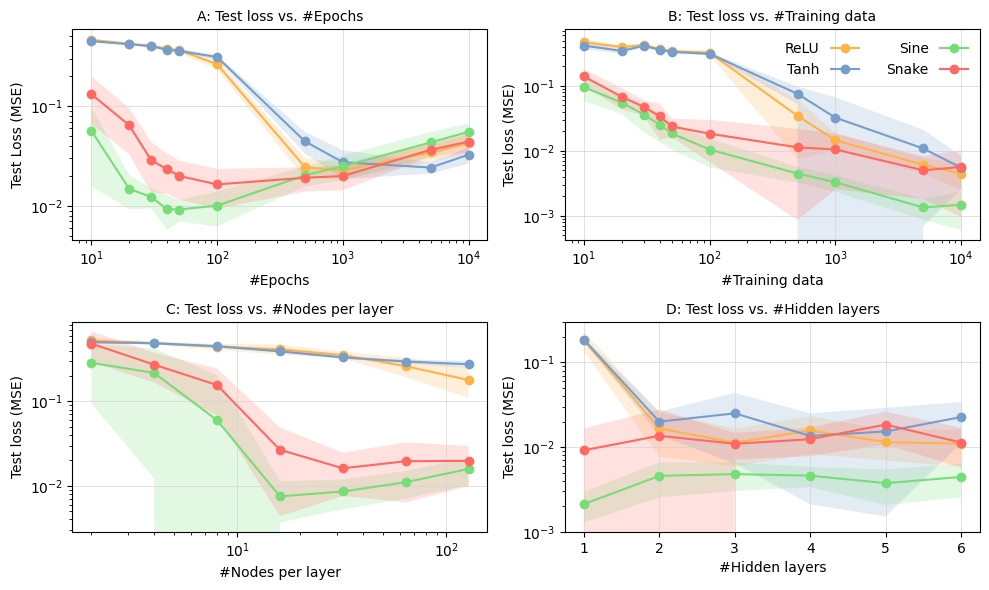

In [108]:
reload(func);

fig, ax = plt.subplots(2, 2, figsize=(10, 6)) #, sharey=True)
ax = ax.flatten()

func.plot_test_loss_vs_parameter(results_test_loss_vs_epochs, 'Epochs', '#Epochs', 'A: Test loss vs. #Epochs', ax=ax[0], log=True)
func.plot_test_loss_vs_parameter(results_test_loss_vs_num_train_points, 'Num_points', '#Training data', 'B: Test loss vs. #Training data', ax=ax[1], log=True, legend=True)
func.plot_test_loss_vs_parameter(results_test_loss_vs_num_nodes, 'Nodes_Per_Layer', '#Nodes per layer', 'C: Test loss vs. #Nodes per layer', ax=ax[2], log=True)
func.plot_test_loss_vs_parameter(results_test_loss_vs_num_hidden_layers, 'Hidden_Layers', '#Hidden layers', 'D: Test loss vs. #Hidden layers', ax=ax[3], log=False)

ax[0].set_ylabel('Test Loss (MSE)')
fig.tight_layout()

if save_plots:
    plt.savefig('E1_Plots/test_loss_vs_all_parameters.png', dpi=300)
